# This is the Capstone Project For Third Semester 

# Welcome To: Sentiment Analysis for Predicting Bitcoin Values

Importing the Required Libraries

In [1]:
# Libraries for Visualization and Mathematical Problems
import tweepy
import json
import csv
import re
import pandas as pd
import nltk
import numpy as np 
import textblob
import matplotlib.pyplot as plt 

# Libraries for Modeling and Sentiment Analysis
from textblob import TextBlob

from sklearn.svm import SVC
from sklearn import metrics   
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.model_selection
from sklearn import preprocessing, metrics, svm, tree, ensemble

#Libraries for Neural Networks

#from keras.models import Sequential
# from keras.layers import Dense

Building the API for requesting data from Twitter(## DON'T RUN IT AGAIN IF ONCE DONE##)

In [2]:
#auth =  tweepy.auth.OAuthHandler('RHFekehJM9sXk5zcc7TDuEbeD', 'M2gI9MC8XVpnzzYu2X7phyquraY02SCsNOFseQWt6ZEmjIpduP')

# auth.set_access_token('1085752350759804929-2iLtD4lsamgXJzXvEh4rvBCzakDJg8', 'gfKcQzcBoV07evCB0O8CIR4SWZVGMxvNpZpI9JTEiCosu')

# #Build API to fetch desired tweet and save it in a CSV file.
# api = tweepy.API(auth, wait_on_rate_limit=True)

# tweets = open('Bit_Tweets_Dated.csv', 'a')
# write_tweets = csv.writer(tweets)
# for tweet in tweepy.Cursor(api.search, q = 'bitcoin', lang = 'en').items():
#     write_tweets.writerow([tweet.text.encode('utf-8')])
# tweets.close()

Read The CSV file for fetched TWEETS.

In [3]:
df = pd.read_csv("Bit_Tweets_Dated.csv", sep=',', 
                   names = ['text'])
#print(df.head())
df = pd.DataFrame(df['text'])
print(df.head())

#Clean out the empty row if any.
df = df.dropna(axis = 0, how = 'any')
print(df.head())

                                                text
0  b'BTC/USD Orderbook Density - Asks: $99922/$ w...
1  b'Top 6 BTC/USD Exchange Orderbooks: Resistanc...
2  b'Watch "Cape Coral man becomes millionaire wi...
3  b'Hey its the top of the hour time to beg mrbe...
4  b'Bitcoin news which you should not miss.\n#BT...
                                                text
0  b'BTC/USD Orderbook Density - Asks: $99922/$ w...
1  b'Top 6 BTC/USD Exchange Orderbooks: Resistanc...
2  b'Watch "Cape Coral man becomes millionaire wi...
3  b'Hey its the top of the hour time to beg mrbe...
4  b'Bitcoin news which you should not miss.\n#BT...


# PreProcessing the Text Data (Text Mining)

In [6]:
def clean_tweet(data): 
        ''' 
        Function to clean tweet text by removing links, special characters 
        using simple regex statements. 
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", data).split())

df['text'] = df['text'].apply(lambda x:x.replace('\n','') )
# Remove b' as it is Meanig-less and not Required. 
df['text'] = df['text'].apply(lambda x:x.replace("b'",''))

df['text'] = df['text'].apply(clean_tweet)
print(df.info())
print("CLEANED TWEETS: ",'\n',df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16501 entries, 0 to 16500
Data columns (total 1 columns):
text    16501 non-null object
dtypes: object(1)
memory usage: 193.4+ KB
None
CLEANED TWEETS:  
                                                 text
0  BTC USD Orderbook Density Asks 99922 within 39...
1  Top 6 BTC USD Exchange Orderbooks Resistance t...
2  Watch Cape Coral man becomes millionaire with ...
3  Hey its the top of the hour time to beg mrbeas...
4  Bitcoin news which you should not miss n BTC b...


# Getting The Sentiments of Tweets.

In [17]:
# Build a function that will give out Polarity of Sentiments
def senti_analysis(tweet):
    """This function will return the Polarity of the sentiments of tweet """
    return TextBlob(tweet).sentiment.polarity
#Create a empty list to store the polarities of the sentiments
a =[]
i = 0
for i in df['text']:
    
    pol = senti_analysis(i)
    a.append(pol)

#print(a)   
#Convert the above list into a dataframe
df2 = pd.DataFrame({'POLARITY':a})
POLS=[]
for j in df['text']:    
    if TextBlob(str(j)).sentiment.polarity > 0:
        POLS.append(1)
    elif TextBlob(str(j)).sentiment.polarity == 0:
         POLS.append(0)
    else:
        POLS.append(-1)
    #print(analysis)
    
 
df3 = pd.DataFrame({'Senti':POLS})   
print(df2.head(10))


   POLARITY
0  0.000000
1  0.500000
2  0.000000
3  0.500000
4  0.000000
5  0.250000
6  0.000000
7  0.153333
8  0.300000
9  0.250000


Reading The Historical Data of BitCoin (Got From Kaggle)
And Fetching the Desired Columns

In [18]:
Bit_Vals =pd.read_csv("Bit_Values.csv")

print(Bit_Vals.head())
df_time = Bit_Vals["Timestamp"]
BIT_Volume =Bit_Vals["Volume_(BTC)"]
BIT_Open_Price = Bit_Vals["Open_Val"]
BIT_Price = Bit_Vals["Weighted_Price"]
#Fillin the empty values With the Mean
BIT_Price = BIT_Price.fillna(BIT_Price.mean())

    Timestamp  Volume_(BTC)     Open_Val  Weighted_Price
0  1542542160      1.103599  5517.801061     5518.610000
1  1542542220      3.218251  5517.979676     5517.801061
2  1542542280      1.823813  5515.205192     5517.979676
3  1542542340      4.256536  5513.669804     5514.205192
4  1542542400      2.436331  5518.173452     5513.669804


##### Building the Final DataFrames 

In [20]:
""" DataFrame for Classification Problem """

Class_df = pd.concat([df_time,df2,BIT_Volume,BIT_Price,df3], axis=1 )
#print(Class_df.head(10))


Classification_DF = Class_df.dropna(axis = 0, how = 'any')
print(Classification_DF.head())

# To convert dataframe to csv please UNCOMMENT the below
#Classification_DF.to_csv(Classification.csv, encoding='utf-8', index=False)

    Timestamp  POLARITY  Volume_(BTC)  Weighted_Price  Senti
0  1542542160       0.0      1.103599     5518.610000    0.0
1  1542542220       0.5      3.218251     5517.801061    1.0
2  1542542280       0.0      1.823813     5517.979676    0.0
3  1542542340       0.5      4.256536     5514.205192    1.0
4  1542542400       0.0      2.436331     5513.669804    0.0


In [21]:
""" DataFrame for Regression Problem """

Regress_df = pd.concat([df_time,df2,BIT_Open_Price,BIT_Volume,BIT_Price], axis=1 )
#Regress_df = pd.concat([df_time,df2,BIT_Price], axis=1 )


Regress_df = Regress_df.dropna(axis = 0, how = 'any')
print(Regress_df.head())

# To convert dataframe to csv please UNCOMMENT the below
#Regress_DF.to_csv(regessor.csv, encoding='utf-8', index=False)

    Timestamp  POLARITY     Open_Val  Volume_(BTC)  Weighted_Price
0  1542542160       0.0  5517.801061      1.103599     5518.610000
1  1542542220       0.5  5517.979676      3.218251     5517.801061
2  1542542280       0.0  5515.205192      1.823813     5517.979676
3  1542542340       0.5  5513.669804      4.256536     5514.205192
4  1542542400       0.0  5518.173452      2.436331     5513.669804


### CLASSIFICATION

In [22]:
X = Classification_DF.drop(["Senti"], axis =1)
# print(X.head())
Y = Classification_DF["Senti"]
# print(Y.head())

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)
#Build A Pipeline for SVC And StandardScaler
pipeline = Pipeline([('scaler', StandardScaler()), ('SVM', SVC())])

pipeline.fit(X_train,y_train)

Predictions = pipeline.predict(X_test)

c_m = metrics.confusion_matrix(y_test, Predictions)
c_r = metrics.classification_report(y_test, Predictions)
m_a_e = metrics.mean_absolute_error(y_test,Predictions)

print(c_m,'\n', c_r,'\n', m_a_e)
print(metrics.accuracy_score(y_test, Predictions))

c:\users\sukhman singh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\sukhman singh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


[[ 378   24    0]
 [   0 1570    0]
 [   0   41 1203]] 
               precision    recall  f1-score   support

        -1.0       1.00      0.94      0.97       402
         0.0       0.96      1.00      0.98      1570
         1.0       1.00      0.97      0.98      1244

   micro avg       0.98      0.98      0.98      3216
   macro avg       0.99      0.97      0.98      3216
weighted avg       0.98      0.98      0.98      3216
 
 0.020211442786069653
0.9797885572139303


c:\users\sukhman singh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Plotting the Confusion Matrix

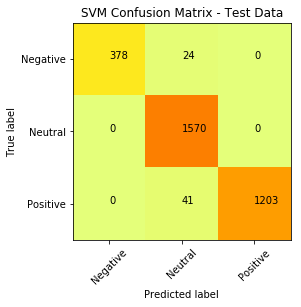

In [23]:
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline
#<<%Matplotlib will not work in normal Sublime environment
plt.imshow(c_m, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Neutral','Positive']
plt.title('SVM Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)


for i in range(3):
    for j in range(3):
        plt.text(j,i, str(c_m[i][j]))
plt.show()          

### Applying The K_Fold Algorithm 

In [32]:
X_F = Classification_DF.iloc[:, 0:4].values
Y = Classification_DF.iloc[:,4].values
KF = sklearn.model_selection.StratifiedKFold( n_splits=10, shuffle=True)
KF.get_n_splits(Y,X_F)
#print(KF)
# Build A function to validate the best classifier
def folds(X, Y,Classifier, Kf):
  y_pred = Y.copy()
  for ii,jj in KF.split(X, Y):
      X_train, X_test = X[ii], X[jj]
      y_train = Y[ii]
      clf = Classifier()
      clf.fit(X_train,y_train)
      y_pred[jj] = clf.predict(X_test)
  return y_pred


# Print The Accuracy results of Different Classifier
print(metrics.accuracy_score(Y, folds(X_F, Y, ensemble.GradientBoostingClassifier, KF)))
print(metrics.accuracy_score(Y, folds(X_F, Y, ensemble.RandomForestClassifier, KF)))
print(metrics.accuracy_score(Y, folds(X_F, Y, SVC, KF)))
"""AS Results We Got GradientBoostingClassifier and RandomForestClassifier gives accuracy of 99% that can be Overfitting 
    so, we decided to chose the SVC that we already did Above.
"""

# Regression

In [33]:
#Regression for Prediction of Bitcoin

X_feat = Regress_df.drop(["Weighted_Price"], axis=1)
X_feat = X_feat.values
Y_targ = Regress_df["Weighted_Price"].values
Y_targ = Y_targ.reshape(-1, 1)

sc = StandardScaler()
X_feat = sc.fit_transform(X_feat)
Y_targ = sc.fit_transform(Y_targ)

#Mutiple Linear Regression
import statsmodels.api as sm
X_Scaled1 = sm.add_constant(X_feat)
model = sm.OLS(Y_targ, X_Scaled1)
model_fit = model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                 1.300e+05
Date:                Wed, 27 Mar 2019   Prob (F-statistic):               0.00
Time:                        16:33:49   Log-Likelihood:                 5435.1
No. Observations:               15708   AIC:                        -1.086e+04
Df Residuals:                   15703   BIC:                        -1.082e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.731e-15      0.001  -3.46e-12      1.0

# Implementation of Neural Network for Reggression.

Not able to Show Results as, Python3.7 is not compatible with Keras
##Results Will be Uploaded SOON, by creating a Virtual Environment in "Anaconda"

In [37]:
"""  INCOMPLETE Neural Network Implementation of Regressio/Prediction Problem """

# from keras.models import Sequential
# from keras.layers import Dense

# model = Sequential()

# input_layer = Number of Features in Regression DataFrame
num_cols = Regress_df.shape[1]
print("Number of Input Layers will be: ","'",num_cols,"'")

# #Adding Layers to the model
# model.add(Dense(150, activation='relu', input_shape=(num_cols,)))
# model.add(Dense(150, activation='relu'))
# model.add(Dense(150, activation='relu'))
# model.add(Dense(1))

# #Compile the model Taking Mean_Squared_error as the performance measure

# model.compile(optimizer='adam', loss ='mean_squared_error')

# #Fit/Train the created model
# model.fit(train_data, test_data, validation=0.2, epochs=, callbacks=[])


Number of Input Layers will be:  ' 5 '
